<a href="https://colab.research.google.com/github/dton24/Notes/blob/main/Machine_Learning_with_ML_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 4567 - Big Data Analytics
# Dr. Mohammad Salehan
# Machine Learning with Spark

As of Spark 2.0, the RDD-based APIs in the spark.mllib package have entered maintenance mode. The primary Machine Learning API for Spark is now the DataFrame-based API in the spark.ml package.

If you get a cell_monitor error, you can ignore it. It is a Jypyter cell error and not a Spark error.

Dataset information: Predicting forest cover type from cartographic variables.  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. <a href='https://archive.ics.uci.edu/ml/datasets/covertype'>Data Description</a>

## Loading the data

In [1]:
pip install ucimlrepo

In [5]:
# ! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=11af71cbb5ab5a349b5c07565f33fead9a255e82faeb7a5127217e998d8f0d66
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [43]:
import pyspark.pandas as ps
import pandas as pd
import matplotlib.pyplot as plt
ps.set_option('plotting.backend', 'matplotlib')

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets


In [46]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [ ]:
forest = ps.from_pandas(X)

In [56]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [58]:
forest = forest.merge(y, left_index=True, right_index=True, how='inner')

In [59]:
forest.shape

(581012, 55)

In [60]:
forest.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 581012 entries, 26 to 580817
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-n

In [61]:
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


## Introducing Transformers

List of most popular **Transformers**
* Binarizer
* Bucketizer
* ChiSqSelector
* CountVectorizer
* DCT
* ElementwiseProduct
* HashingTF
* IDF
* IndexToString
* MaxAbsScaler
* MinMaxScaler
* NGram
* Normalizer
* OneHotEncoder
* PCA
* PolynomialExpansion
* QuantileDiscretizer
* RegexTokenizer
* RFormula
* SQLTransformer
* StandardScaler
* StopWordsRemover
* StringIndexer
* Tokenizer
* VectorAssembler
* VectorIndexer
* VectorSlicer
* Word2Vec

In [62]:
import pyspark.sql.functions as F
import pyspark.ml.feature as feat
from pyspark.ml import Pipeline
import numpy as np

## Principal Components Analysis
* PCA is a dimension reduction technique.
<img src='https://miro.medium.com/max/462/1*QALwLkPJG45E7_DsOccdaw.png'>
* Almost exclusively, every estimator (or, in other words, an ML model) found in the MLlib module expects to see a single column as an input; the column should contain all the features a data scientist wants such a model to use.
* The .VectorAssembler(...) method, as the name suggests, collates multiple features into a single column.  

In [63]:
vectorAssembler = (
    feat.VectorAssembler(
        inputCols=list(forest.columns),
        outputCol='feat'
    )
)

norm = feat.StandardScaler(
    inputCol=vectorAssembler.getOutputCol()
    , outputCol='norm'
    , withMean=True
    , withStd=True
)

#fit PCA to the vector with 5 components
pca = (
    feat.PCA(
        k=25
        , inputCol=norm.getOutputCol()
        , outputCol='pca_feat'
    )
)

#transform the data using PCA
#original dataset contains 55 columsn
#the output shows one vectorized record as well as
#the 5 feature output of the record from PCA
pca_pipeline = Pipeline(stages=[vectorAssembler, norm, pca])
pModel = (
    pca_pipeline
    .fit(forest.to_spark())
)

(
    pModel.
    transform(forest.to_spark()).
    pandas_api()
    [['feat','pca_feat']]
    .head(1)
)

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,feat,pca_feat
0,"(2596.0, 51.0, 3.0, 258.0, 0.0, 510.0, 221.0, ...","[-1.8631037698354762, -1.8072938588335041, 0.9..."


In [64]:
print(pModel.stages[-1].explainedVariance)
print(np.cumsum(pModel.stages[-1].explainedVariance))

[0.06927023484521937,0.05390975992287556,0.04363724152271419,0.036458400251684425,0.02786360060751766,0.02756540880341634,0.02356452842201528,0.02220443136313928,0.021177421671991926,0.019962333113455598,0.01970977504374972,0.01950907890673676,0.019405387771032793,0.019068894613266003,0.018861053731108742,0.018791958581875674,0.0186990960909938,0.01865491744075074,0.01862533337201029,0.018491151987891134,0.018441968733553176,0.01842704280325099,0.018388675816592922,0.01835975081801126,0.018334210166115864]
[0.06927023 0.12317999 0.16681724 0.20327564 0.23113924 0.25870465
 0.28226917 0.30447361 0.32565103 0.34561336 0.36532314 0.38483221
 0.4042376  0.4233065  0.44216755 0.46095951 0.47965861 0.49831352
 0.51693886 0.53543001 0.55387198 0.57229902 0.5906877  0.60904745
 0.62738166]


## Sparse Vector
A sparse vector is a vector that has a large number of zeros so it takes unwanted space to store these zeroes. Instead of storing all of the values, we can store the non-zero values and their indices.  
[6, 0, 0, 1, 0, 2, 0, 0, 0] => {0 : 6, 3 : 1, 5 : 2}

## Introducing Estimators

List of most popular **Estimators**
1. Classification
 * LinearSVC
 * LogisticRegression
 * DecisionTreeClassifier
 * GBTClassifier
 * RandomForestClassifier
 * NaiveBayes
 * MultilayerPerceptronClassifier
 * OneVsRest
2. Regression
 * AFTSurvivalRegression
 * DecisionTreeRegressor
 * GBTRegressor
 * GeneralizedLinearRegression
 * IsotonicRegression
 * LinearRegression
 * RandomForestRegressor
3. Clustering
 * BisectingKMeans
 * Kmeans
 * GaussianMixture
 * LDA

In [67]:
#examine all distinct values for dependent variable
forest.groupby('Cover_Type').size().sort_values()

Cover_Type
4      2747
5      9493
6     17367
7     20510
3     35754
1    211840
2    283301
dtype: int64

### Transforming the label
We transform the labels to start at zero (instead of one) otherwise classification models think there are 8 classes.

In [68]:
forest['Cover_Type'] = forest['Cover_Type'] - 1
forest.groupby('Cover_Type').size().sort_values()

Cover_Type
3      2747
4      9493
5     17367
6     20510
2     35754
0    211840
1    283301
dtype: int64

## Linear Support Vector Machine (SVM)
* SVM is a classification and regression technique that tries to separate the two classes using a hyperplane.
* SVM algorithm finds the points closest to the line from both the classes.These points are called support vectors.
* Then, it compute the distance between the line and the support vectors. This distance is called the margin.
* The goal is to maximize the margin.
* Watch <a href='https://www.youtube.com/watch?v=Y6RRHw9uN9o'>this video </a> to learn more about SVM.  
<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png'></center>

In [70]:
import pyspark.ml.classification as cl

#create a vector of all variables except for the dependent variable
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features')

#We will predict the forest cover type equal to 1, that is,
#whether the forest is a spruce-fir type; we achieve this by
#checking whether CoverType is equal to 1 and
#casting the resulting Boolean to an integer (0: false, 1: true)
fir_dataset = (
    vectorAssembler
    .transform(forest.to_spark())
    .pandas_api()
    .assign(label=(lambda x: (x['Cover_Type']==0).astype('int')))
    [['label', 'features']]
)

fir_dataset.head(1)

,label,features
0,0,"(2596.0, 51.0, 3.0, 258.0, 0.0, 510.0, 221.0, ..."


In [71]:
#create a SVM object and fit to data
#the default value of label coulmn is label
#regParam is regularization parameter. In this case it will be L2
svc_obj = cl.LinearSVC(maxIter=10, regParam=0.01)
svc_model = svc_obj.fit(fir_dataset.to_spark())

#examine the model coefficients. SVM is a linear model.
svc_model.coefficients

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


DenseVector([0.0049, -0.0001, -0.0055, -0.001, -0.0004, -0.0001, -0.004, -0.0097, 0.0003, 0.0, 0.2033, -0.3137, -0.2912, -0.3126, -0.039, -0.3129, -0.3156, -1.0848, -0.1864, 1.0857, 0.3221, 0.0, -0.3499, -0.1888, -0.3124, -0.3121, -0.0256, 0.2393, -0.4822, 0.7021, 0.2907, 1.7207, 0.8135, 0.6715, 0.5955, -1.2942, 0.066, 0.9147, 0.0, -0.3515, -0.3654, 0.2164, -0.2106, 0.076, -0.7802, -1.1478, -1.6823, -2.9337, -0.0, -0.3089, -0.7262, -0.2355, -0.1469, -0.3333])

## Linear Regression
In MLlib, we implement popular linear methods such as logistic regression and linear least squares with L1 or L2 regularization. In spark.ml, we also include Pipelines API for Elastic net, a hybrid of L1 and L2 regularization via the elastic net. Mathematically, it is defined as a convex combination of the L1 and the L2 regularization terms:

![Elastic_Net.png](attachment:Elastic_Net.png)

ElasticNetParam corresponds to α and regParam corresponds to λ. The default value for both is zero.

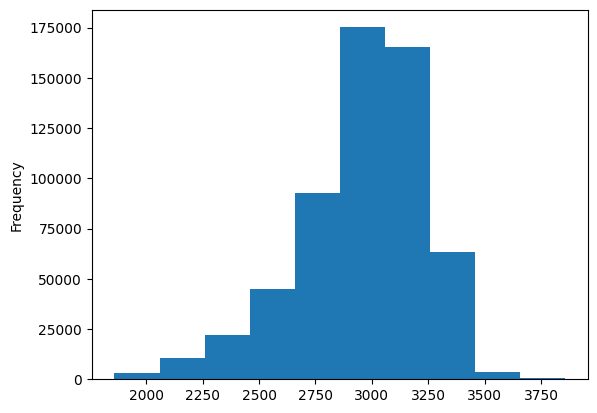

In [74]:
plt.clf()
forest['Elevation'].hist()
%matplotlib inline

In [76]:
import pyspark.ml.regression as rg

# let's predict elevation (first column) using the rest of features
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Elevation']
    , outputCol='features')

#create a linear regression object and fit to dataset
lr_obj = rg.LinearRegression(
    labelCol='Elevation',
    maxIter=10
    , regParam=0.01
    , elasticNetParam=1.00)
# lr_model = lr_obj.fit(elevation_dataset.to_spark())

#examine model coefficients
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
pModel = pip.fit(forest.to_spark())

In [77]:
#get the trained model from the pipeline
lr_model = pModel.stages[-1]
#examine model coefficients
lr_model.coefficients

DenseVector([0.0309, 0.6522, 0.1911, 0.1424, 0.0342, 0.7402, 1.053, -0.0017, -0.0041, 2.7163, -407.4379, -346.0612, -364.3841, -302.6788, -400.5852, -212.9918, -126.1329, -117.7423, -312.0478, -248.7118, -221.4788, -155.1459, -84.5129, -398.0433, -387.8102, -179.4485, -261.3875, -337.7875, 48.0629, -94.7813, 149.8043, 135.144, 80.0901, 64.3659, 124.0233, -115.0126, 119.1285, -181.7498, 10.8056, -42.7849, 65.5441, 102.2562, 36.9865, -48.1163, 379.2091, 256.0169, 497.1714, 313.0607, 337.172, 397.0758, 189.0362, 27.8238, -265.8505, -14.4551])

In [78]:
#print model performance metrics
summary = lr_model.summary

print(
    summary.r2
    , summary.rootMeanSquaredError
    , summary.meanAbsoluteError
)

0.786041246475428 129.50871925702657 103.34079732698731


In [79]:
#get predictions from the model
(
    pModel.transform(forest.to_spark())
    .pandas_api()
    [['Elevation', 'prediction']]
    .head(5)
)

,Elevation,prediction
0,2596,2837.803566
1,2590,2826.189447
2,2579,2889.318473
3,2606,2840.924591
4,2605,2835.813234


## Selecting the most predictable features

## Correlation matrix

In [84]:
import pyspark.ml.stat as st
import pandas as pd

features_and_label = feat.VectorAssembler(
    inputCols=list(forest.columns)
    , outputCol='features'
)

corr = st.Correlation.corr(
    features_and_label.transform(forest.to_spark()),
    'features',
    'pearson'
)

print(str(corr.collect()[0][0]))
corr_pd = corr.toPandas()
output_np = np.array(corr_pd.iloc[0, 0].values).reshape(
    (corr_pd.iloc[0, 0].numRows, corr_pd.iloc[0, 0].numCols))

corr_pd = pd.DataFrame(output_np, columns=forest.columns)
corr_pd.index = forest.columns
corr_pd = ps.from_pandas(corr_pd)
corr_pd

DenseMatrix([[ 1.        ,  0.01573494, -0.24269664, ...,  0.06655009,
              -0.61937392, -0.26955378],
             [ 0.01573494,  1.        ,  0.07872841, ...,  0.07490375,
               0.08268685,  0.0170798 ],
             [-0.24269664,  0.07872841,  1.        , ...,  0.12566267,
               0.25550347,  0.14828541],
             ...,
             [ 0.06655009,  0.07490375,  0.12566267, ...,  1.        ,
              -0.22922641,  0.06684564],
             [-0.61937392,  0.08268685,  0.25550347, ..., -0.22922641,
               1.        ,  0.32319955],
             [-0.26955378,  0.0170798 ,  0.14828541, ...,  0.06684564,
               0.32319955,  1.        ]])


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349,-0.153450

### Univariate Feature Selector
is used for model selection. It selects a smaller subset of features which explain the dependent variable well.
* featureType categorical and labelType categorical, Spark uses chi-squared, i.e. chi2 in sklearn.
* featureType continuous and labelType categorical, Spark uses ANOVA F-test, i.e. f_classif in sklearn.
* featureType continuous and labelType continuous, Spark uses F-value, i.e. f_regression in sklearn.

In [83]:
#exclude the label CoverType from features vector
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features'
)

#select top 10 features, store in a new column named selected
selector = feat.UnivariateFeatureSelector(
    labelCol='Cover_Type'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("categorical"
    ).setLabelType("categorical"
    ).setSelectionThreshold(10) #select top 10 features

pipeline_sel = Pipeline(stages=[vectorAssembler, selector])

model = (
    pipeline_sel
    .fit(forest.to_spark())
    .transform(forest.to_spark())
)

#print selected features
model.schema['selected'].metadata

{'ml_attr': {'attrs': {'numeric': [{'idx': 0, 'name': 'Elevation'},
    {'idx': 1, 'name': 'Aspect'},
    {'idx': 2, 'name': 'Slope'},
    {'idx': 3, 'name': 'Horizontal_Distance_To_Hydrology'},
    {'idx': 4, 'name': 'Vertical_Distance_To_Hydrology'},
    {'idx': 5, 'name': 'Horizontal_Distance_To_Roadways'},
    {'idx': 6, 'name': 'Hillshade_9am'},
    {'idx': 7, 'name': 'Hillshade_Noon'},
    {'idx': 8, 'name': 'Hillshade_3pm'},
    {'idx': 9, 'name': 'Horizontal_Distance_To_Fire_Points'}]},
  'num_attrs': 10}}

In [85]:
#display selected features as a dataframe
pd.DataFrame(model.schema['selected'].metadata['ml_attr']['attrs']['numeric'])

,idx,name
0,0,Elevation
1,1,Aspect
2,2,Slope
3,3,Horizontal_Distance_To_Hydrology
4,4,Vertical_Distance_To_Hydrology
5,5,Horizontal_Distance_To_Roadways
6,6,Hillshade_9am
7,7,Hillshade_Noon
8,8,Hillshade_3pm
9,9,Horizontal_Distance_To_Fire_Points


## Predicting forest coverage type
### Multinomial classification using binary classifiers, one vs the rest technique
<img src='https://miro.medium.com/max/972/1*SwXHlCzh-d9UqHOglp3vcA.png' />  
<a href='https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc'>Image source</a>

### Logistic regression

In [88]:
#split into train and test sets
forest_train, forest_test = (
    forest.to_spark()
    .randomSplit([0.7, 0.3], seed=666)
)

#convert all features ti vector except for last column
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features'
)

#select top 10 predictors
selector = feat.UnivariateFeatureSelector(
    labelCol='Cover_Type'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("categorical"
    ).setLabelType("categorical"
    ).setSelectionThreshold(10) #select top 10 features

#create a multinomial regression object
#DV has 7 classes
logReg_obj = cl.LogisticRegression(
    labelCol='Cover_Type'
    , featuresCol=selector.getOutputCol()
    , regParam=0.01
    , elasticNetParam=1.0
    , family='multinomial'
)

#create pipeline of 1)vector, 2)chisquare selector, 3)logistic regression
pipeline = Pipeline(
    stages=[
        vectorAssembler
        , selector
        , logReg_obj
    ])
#train the model
pModel = pipeline.fit(forest_train)

Check out the Logistic Regression object

In [89]:
pModel.stages[-1]

LogisticRegressionModel: uid=LogisticRegression_36e09468e2da, numClasses=7, numFeatures=10

#### Evaluating the Logistic Regression model

In [91]:
import pyspark.ml.evaluation as ev

#apply the model to test set
logReg_model = (
    pModel
    .transform(forest_test)
)

results_logReg = logReg_model.select('Cover_Type', 'probability', 'prediction')

#evaluate performance of the multinomial model (7 classes)
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Cover_Type')

(
    #F-1 score
    evaluator.evaluate(results_logReg)
    #weighted precision
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'weightedPrecision'}
    )
    #accuracy
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'accuracy'}
    )
)

(0.6505046750037925, 0.6381113270788482, 0.680328715553158)

#### Print selected features from chisquare selector

In [92]:
selected_cols = ([x['name'] for x in logReg_model.schema['selected'].metadata['ml_attr']['attrs']['numeric']])

#print model coefficients
#for a binomial model use coefficients instead of coefficientMatrix
pd.set_option('display.max_columns', 10)
pd.DataFrame(pModel.stages[-1].coefficientMatrix.toArray(), columns=selected_cols).head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,0.008180,0.0,-0.009614,-0.000315,-0.000976,0.000000,-0.003843,-0.003484,0.0,0.000012
1,0.001809,0.0,0.000000,0.001160,0.000000,0.000049,0.000000,0.009256,0.0,0.000086
2,-0.005182,0.0,0.001530,0.000000,0.003324,0.000000,0.000000,0.005233,0.0,-0.000077
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,-0.004099,0.0,0.000000,0.000000,0.000000,0.000000,-0.002959,0.000000,0.0,0.000000
6,0.014343,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### Ensemble Methods: Bagging VS Boosting
#### bagging
<img src='https://miro.medium.com/max/2000/1*_B5HX2whbTs3DS8M6YBD_w@2x.png'/>

#### Boosting
<img src="https://miro.medium.com/max/2000/1*VGSoqefx3Rz5Pws6qpLwOQ@2x.png" />
<a href='https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205'>More information about ensemble methods</a>

Weighted measures are weighted based on the size of each class. Read about multinomial classification performance <a href='https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1'>here</a>.

### Random Forest classifier

In [94]:
#same as previous, this time using Random Forest
rf_obj = cl.RandomForestClassifier(
    labelCol='Cover_Type'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=10
    , numTrees=10
)

pipeline = Pipeline(
    stages=[vectorAssembler, selector, rf_obj]
)

pModel = pipeline.fit(forest_train)

rf_obj_trained = (
    pModel
    .transform(forest_test)
)
results_rf = rf_obj_trained.select('Cover_Type', 'probability', 'prediction')

evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Cover_Type')

(
    evaluator.evaluate(results_rf)
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'}
    )
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}
    )
)

(0.6601063632582731, 0.6572817771764682, 0.685682968540177)

## Estimating forest elevation

### Random Forest regression

In [95]:
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Elevation']
    , outputCol='features')

#minInfoGain: min decrease in impurity to split
rf_obj = rg.RandomForestRegressor(
    labelCol='Elevation'
    , maxDepth=10
    , minInstancesPerNode=10
    , minInfoGain=0.1
    , numTrees=10
)

pip = Pipeline(stages=[vectorAssembler, rf_obj])

results = (
    pip
    .fit(forest.to_spark())
    .transform(forest.to_spark())
    .select('Elevation', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Elevation')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


0.8237720861901816

### Gradient Boosted Trees regression

In [96]:
gbt_obj = rg.GBTRegressor(
    labelCol='Elevation'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(forest.to_spark())
    .transform(forest.to_spark())
    .select('Elevation', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Elevation')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

0.835109243526621

## Clustering forest cover type

In [97]:
import pyspark.ml.clustering as clust

#include all features except for the label
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features')

norm = feat.StandardScaler(
    inputCol=vectorAssembler.getOutputCol()
    , outputCol='standardized'
    , withMean=True
    , withStd=True
)

#KMeans with k = 7
#set distance measure to euclidean or cosine
distance_measure = 'euclidean'
kmeans_obj = clust.KMeans(k=7,
                          seed=666,
                          featuresCol=norm.getOutputCol(),
                          distanceMeasure=distance_measure)

pip = Pipeline(stages=[vectorAssembler, norm, kmeans_obj])

In [98]:
clustering_results = (
    pip
    .fit(forest.to_spark())
    .transform(forest.to_spark())
    .pandas_api()
)

clustering_results[['Cover_Type', 'prediction']].head(10)

,Cover_Type,prediction
0,4,6
1,4,6
2,1,6
3,4,6
4,4,6
5,4,6
6,4,6
7,4,6
8,4,6
9,4,6


* Calculate the Silhouette metric for clustering model  
* Silhouette ranges from −1 to +1  
* Anything around 0.5 or more indicates well separated clusters

In [100]:
eval_distance_measure = 'squaredEuclidean' if distance_measure == 'euclidean' else distance_measure
clustering_ev = ev.ClusteringEvaluator(featuresCol=norm.getOutputCol(), distanceMeasure=eval_distance_measure)
clustering_ev.evaluate(clustering_results.to_spark())

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


-0.032075455849398984

### Visualizing Clusters

In [99]:
clustering_results.prediction.value_counts()

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


1    256448
6    223966
5     31478
0     29971
4     13806
2     12947
3     12396
Name: prediction, dtype: int64

In [101]:
def cluster_scatter(df, x, y, color):
    plt.clf()
    ax = df.plot.scatter(x, y, c=color, colormap='viridis')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'Clustering {x} vs {y}');
    return ax

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/plot/matplotlib.py:859: FutureWarning: Argument `sort_columns` will be removed in 4.0.0.
  warnings.warn(


AttributeError: PathCollection.set() got an unexpected keyword argument 'sort_columns'

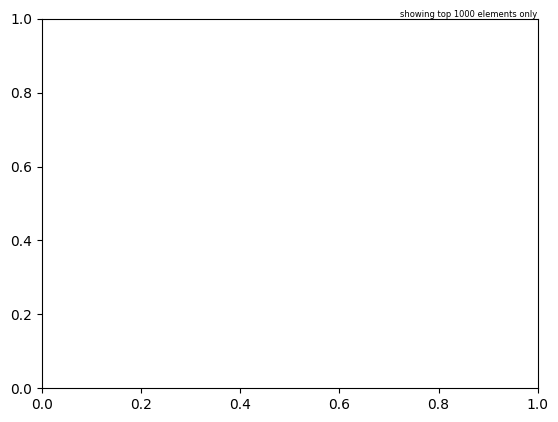

In [104]:
%matplotlib inline

clusters_0_and_1 = clustering_results[clustering_results.prediction.isin([0,1])]
clusters_0_and_1.plot.scatter(x='Elevation', y='Aspect', c='prediction', colormap='viridis')

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/plot/matplotlib.py:859: FutureWarning: Argument `sort_columns` will be removed in 4.0.0.
  warnings.warn(


AttributeError: PathCollection.set() got an unexpected keyword argument 'sort_columns'

<Figure size 640x480 with 0 Axes>

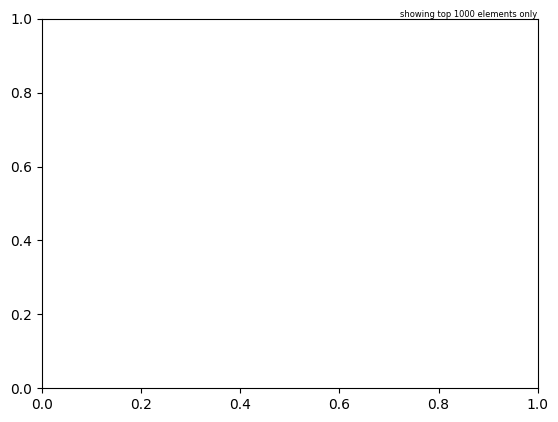

In [103]:
clusters_3_and_13 = clustering_results[clustering_results.prediction.isin([3,13])]
cluster_scatter(clusters_3_and_13, 'Aspect', 'Slope', 'prediction')
%matplotlib inline

In [105]:
clustering_results.groupby('prediction')[['Elevation', 'Aspect', 'Slope']].mean()

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/groupby.py:649: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


,Elevation,Aspect,Slope
prediction,,,
1,3031.395932,167.168502,14.505011
6,3015.491936,139.505541,12.438138
3,2611.358099,168.703130,20.790497
5,2302.399517,202.447297,21.971980
4,3306.792482,161.606548,18.596335
2,2452.147756,152.429134,17.227620
0,2816.616062,121.965467,8.667712


## Tuning hyper parameters

## Grid search
* Grid search allows us to test different values for hyper parameters, such as learning rate, regularization parameter, and elestic net parameter, and select the best values. Running the following cell will take several minutes.  
* Use divide and conquer to find the best values for hyperparameters. Start with something like this: [0, 0.25, 0.5, .75, 1]  
* Assuming that the best value is 0.75, you need to narrow down your search to [0.5, 1] range like this: [0.5, .6, .7, .8, .9, 1]  
* Assuming that the best value from previous step is 0.6, you should further narrow down the scope to [0.5, 0.7] range using the following: [.5, .54, .58, .62, .66, .7]

### Grid Search for Regularization Parameters

In [107]:
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features')

selector = feat.UnivariateFeatureSelector(
    labelCol='Cover_Type'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("categorical"
    ).setLabelType("categorical"
    ).setSelectionThreshold(10) #select top 10 features

logReg_obj = cl.LogisticRegression(
    labelCol='Cover_Type'
    , featuresCol=selector.getOutputCol()
    , family='multinomial'
)


#use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    #try 4 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.0, 0.01, 0.02]
        )
    #try 4 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [0.0, 0.5, 1.0]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
        , labelCol='Cover_Type')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)

pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(forest_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(forest_train)
)

Py4JJavaError: An error occurred while calling o8588.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 2051.0 failed 1 times, most recent failure: Lost task 1.0 in stage 2051.0 (TID 30555) (799d9eb6127d executor driver): java.lang.OutOfMemoryError: Java heap space
	at net.jpountz.lz4.LZ4BlockOutputStream.<init>(LZ4BlockOutputStream.java:104)
	at org.apache.spark.io.LZ4CompressionCodec.compressedOutputStream(CompressionCodec.scala:151)
	at org.apache.spark.serializer.SerializerManager.wrapForCompression(SerializerManager.scala:159)
	at org.apache.spark.serializer.SerializerManager.wrapStream(SerializerManager.scala:134)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:165)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:308)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$2481/0x0000000840fcbc40.apply(Unknown Source)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at net.jpountz.lz4.LZ4BlockOutputStream.<init>(LZ4BlockOutputStream.java:104)
	at org.apache.spark.io.LZ4CompressionCodec.compressedOutputStream(CompressionCodec.scala:151)
	at org.apache.spark.serializer.SerializerManager.wrapForCompression(SerializerManager.scala:159)
	at org.apache.spark.serializer.SerializerManager.wrapStream(SerializerManager.scala:134)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:165)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:308)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$2481/0x0000000840fcbc40.apply(Unknown Source)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
print('Best params - regParam: {}, elasticNetParam: {}'.format(
    logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

In [ ]:
import pandas as pd
tuning_results = pd.DataFrame([list(x.values()) for x in logReg_grid], columns=['regParam', 'elasticNetParam'])
tuning_results['F-1'] = logReg_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)

In [ ]:
# measure performance of best model
data_trans_test = data_trans.transform(forest_test)
results = logReg_modelTest.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'f1'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))

In [ ]:
selected_cols = ([x['name'] for x in data_trans_test.schema['selected'].metadata['ml_attr']['attrs']['numeric']])

#print model coefficients
#for a binomial model use coefficients instead of coefficientMatrix
pd.set_option('display.max_columns', 10)
pd.DataFrame(logReg_modelTest.bestModel.coefficientMatrix.toArray(), columns=selected_cols).head(10)

In [ ]:
trainingSummary = logReg_modelTest.bestModel.summary
# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

### Grid Search for Random Forest

In [108]:
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in forest.columns if x != 'Cover_Type']
    , outputCol='features')

selector = feat.UnivariateFeatureSelector(
    labelCol='Cover_Type'
    , outputCol='selected'
    , selectionMode = 'numTopFeatures'
    ).setFeatureType("categorical"
    ).setLabelType("categorical"
    ).setSelectionThreshold(10) #select top 10 features

rf_obj = cl.RandomForestClassifier(
    labelCol='Cover_Type'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=10
    , numTrees=10
)


#use ParamGridBuilder to build a grid of parameters
rf_grid = (
    tune.ParamGridBuilder()
    #try 4 values for minInstancesPerNode
    .addGrid(rf_obj.minInstancesPerNode
            , [5, 10, 20]
        )
    #try 4 values for maxDepth
    .addGrid(rf_obj.maxDepth
            , [10, 20]
        )
    .build()
)

rf_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Cover_Type')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=rf_obj
    , estimatorParamMaps=rf_grid
    , evaluator=rf_ev
)

pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(forest_train)

rf_modelTest = cross_v.fit(
    data_trans.transform(forest_train)
)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: org does not exist in the JVM

In [109]:
print('Best params - MaxDepth: {}, MinInstancesPerNode: {}'.format(
    rf_modelTest.bestModel._java_obj.getMaxDepth(),
      rf_modelTest.bestModel._java_obj.getMinInstancesPerNode()))

NameError: name 'rf_modelTest' is not defined

In [ ]:
import pandas as pd
tuning_results = pd.DataFrame([list(x.values()) for x in rf_grid], columns=['minInstancesPerNode', 'maxDepth'])
tuning_results['F-1'] = rf_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)